In [72]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import sklearn
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
#
import os
import numpy as np
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
#
from sklearn.preprocessing import LabelEncoder
make_lb = LabelEncoder()
#
from sklearn.preprocessing import LabelBinarizer
lbb = LabelBinarizer()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [2]:
def clean_drop(data):
    """Provide data frame in parenthesis and this function will
        drop nulls permanently, and reset the index."""
    data.dropna(inplace=True)
    data.reset_index(drop=True, inplace=True)
    return data
def reset_index(data):
    """Provide data frame in parenthesis and this function will
        reset your index."""
    data.reset_index(drop=True, inplace=True)
    return data
def make_value_chart(data, column, x_label, y_label, title, color='PRGn'):
    """Must fill out all arguments EXCEPT color. Color has a default setting."""
    fig, ax = plt.subplots(figsize=(14,8))
    ax = sns.barplot(x=list(data[column].value_counts().keys()),
     y=data[column].value_counts(), palette=color)    
    ax.set_xticklabels(ax.get_xticklabels(),
                      rotation=45, horizontalalignment='right')
    plt.xlabel(x_label, size=20)
    plt.ylabel(y_label, size=20)
    plt.title(title, size=26)
    return plt.show()
def rename_column(data, column, new_name):
    """Quickly renames columns"""
    data.rename(columns={column: new_name}, inplace=True)
    return data
def drop(data, columns=[]):
    """Quickly drops columns"""
    data.drop(columns=columns, inplace=True)
    return data
def dummy_up(data, column, prefix):
    """Quickly makes dummies for the selected column"""
    new = pd.get_dummies(data[column], prefix=prefix, drop_first=True)
    return new
def factorize(data, column):
    new = pd.factorize(data[column])[0] + 1
    return new


# Read in Data & Data Cleaning

In [3]:
## Read in Data
df = pd.read_csv('bank-additional-full.csv', sep =';')


In [4]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [6]:
df=df.replace('unknown', np.NaN)

In [7]:
clean_drop(df)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
30484,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30485,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
30486,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [8]:
yes_no = {'no': 0,
         'yes': 1}

In [9]:
df.replace(yes_no, inplace=True)

In [10]:
for (columnName, columnData) in df.iteritems():
   print('Colunm Name : ', columnName)
   print('Column Contents : ', columnData.unique())

Colunm Name :  age
Column Contents :  [56 37 40 59 24 25 29 57 35 50 30 55 41 54 34 52 32 38 45 39 60 53 51 48
 44 31 49 33 42 36 43 46 28 58 27 47 26 22 23 20 21 18 70 61 66 76 67 73
 88 95 19 68 75 63 62 65 72 64 71 69 78 85 80 79 77 83 81 74 82 17 87 91
 94 86 84 89]
Colunm Name :  job
Column Contents :  ['housemaid' 'services' 'admin.' 'technician' 'blue-collar' 'unemployed'
 'retired' 'entrepreneur' 'management' 'student' 'self-employed']
Colunm Name :  marital
Column Contents :  ['married' 'single' 'divorced']
Colunm Name :  education
Column Contents :  ['basic.4y' 'high.school' 'basic.6y' 'professional.course' 'basic.9y'
 'university.degree' 'illiterate']
Colunm Name :  default
Column Contents :  [0 1]
Colunm Name :  housing
Column Contents :  [0 1]
Colunm Name :  loan
Column Contents :  [0 1]
Colunm Name :  contact
Column Contents :  ['telephone' 'cellular']
Colunm Name :  month
Column Contents :  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Colunm Name :  day_

In [11]:
df.job.unique()

array(['housemaid', 'services', 'admin.', 'technician', 'blue-collar',
       'unemployed', 'retired', 'entrepreneur', 'management', 'student',
       'self-employed'], dtype=object)

In [12]:
df.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'professional.course',
       'basic.9y', 'university.degree', 'illiterate'], dtype=object)

In [13]:
drop(df, 'duration')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,37,services,married,high.school,0,1,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,56,services,married,high.school,0,0,1,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,59,admin.,married,professional.course,0,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,73,retired,married,professional.course,0,1,0,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
30484,46,blue-collar,married,professional.course,0,0,0,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
30485,56,retired,married,university.degree,0,1,0,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
30486,44,technician,married,professional.course,0,0,0,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [14]:
df.default.value_counts()

0    30485
1        3
Name: default, dtype: int64

In [15]:
drop(df, 'default')

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,37,services,married,high.school,1,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,40,admin.,married,basic.6y,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,56,services,married,high.school,0,1,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,59,admin.,married,professional.course,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,73,retired,married,professional.course,1,0,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
30484,46,blue-collar,married,professional.course,0,0,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
30485,56,retired,married,university.degree,1,0,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
30486,44,technician,married,professional.course,0,0,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [16]:
df['age'].describe()

count    30488.000000
mean        39.030012
std         10.333529
min         17.000000
25%         31.000000
50%         37.000000
75%         45.000000
max         95.000000
Name: age, dtype: float64

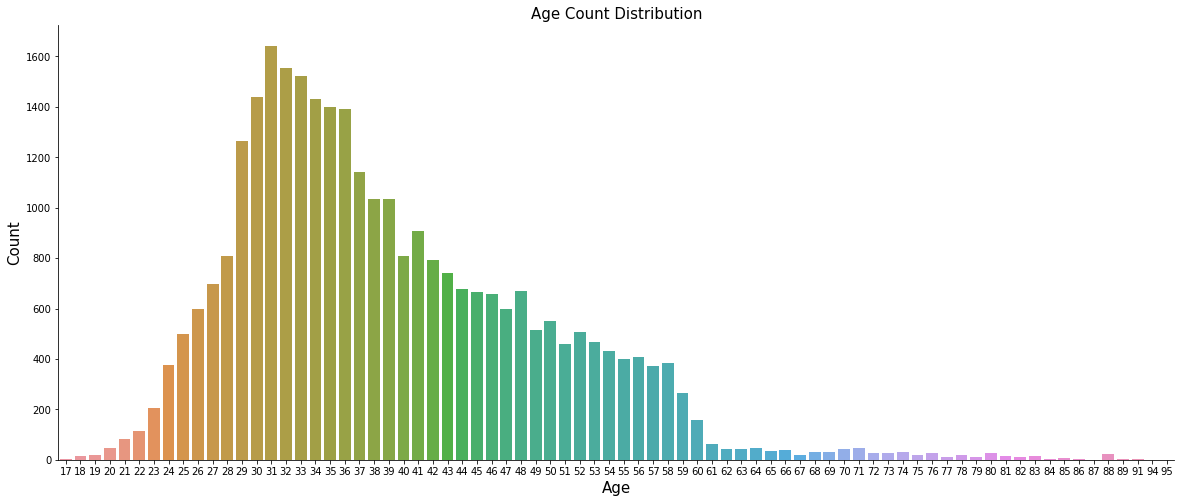

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)
sns.countplot(x = 'age', data = df)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

In [18]:
#bin the ages seperated out by decade

df['age_bin'] = pd.cut(df['age'],9, labels = ['10s','20s', '30s', '40s','50s','60s','70s','80s','90s'])
df[['age', 'age_bin']]
dums = pd.get_dummies(df['age_bin'])
df.drop(columns=['age'], axis =1, inplace =True)
df=df.join(dums)

In [26]:
drop(df, 'age_bin')

,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,10s,20s,30s,40s,50s,60s,70s,80s,90s
0,housemaid,married,basic.4y,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,1,0,0,0,0
1,services,married,high.school,1,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0
2,admin.,married,basic.6y,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0
3,services,married,high.school,0,1,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,1,0,0,0,0
4,admin.,married,professional.course,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,retired,married,professional.course,1,0,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,0,1,0,0
30484,blue-collar,married,professional.course,0,0,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,1,0,0,0,0,0
30485,retired,married,university.degree,1,0,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0
30486,technician,married,professional.course,0,0,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,1,0,0,0,0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30488 entries, 0 to 30487
Data columns (total 28 columns):
job               30488 non-null object
marital           30488 non-null object
education         30488 non-null object
housing           30488 non-null int64
loan              30488 non-null int64
contact           30488 non-null object
month             30488 non-null object
day_of_week       30488 non-null object
campaign          30488 non-null int64
pdays             30488 non-null int64
previous          30488 non-null int64
poutcome          30488 non-null object
emp.var.rate      30488 non-null float64
cons.price.idx    30488 non-null float64
cons.conf.idx     30488 non-null float64
euribor3m         30488 non-null float64
nr.employed       30488 non-null float64
y                 30488 non-null int64
age_bin           30488 non-null category
10s               30488 non-null uint8
20s               30488 non-null uint8
30s               30488 non-null uint8
40s          

## Hypothesis Testing

In [20]:
mc = MultiComparison(df['y'], df['age_bin'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   10s    20s  -0.0718  0.001  -0.101 -0.0426   True
   10s    30s   -0.101  0.001 -0.1305 -0.0715   True
   10s    40s  -0.1014  0.001 -0.1326 -0.0701   True
   10s    50s  -0.0639  0.001 -0.0965 -0.0313   True
   10s    60s   0.2468  0.001  0.1858  0.3079   True
   10s    70s   0.2266  0.001  0.1544  0.2988   True
   10s    80s   0.3085  0.001  0.2101  0.4068   True
   10s    90s   0.2136 0.0152  0.0228  0.4045   True
   20s    30s  -0.0291  0.001 -0.0435 -0.0148   True
   20s    40s  -0.0295  0.001 -0.0471 -0.0119   True
   20s    50s   0.0079    0.9 -0.0121  0.0279  False
   20s    60s   0.3187  0.001  0.2634   0.374   True
   20s    70s   0.2984  0.001  0.2309  0.3659   True
   20s    80s   0.3803  0.001  0.2854  0.4752   True
   20s    90s   0.2855  0.001  0.0964  0.4746   True
   30s    40s  -0.0004    0.9 -0.0185  0.0177 

In [21]:
mc = MultiComparison(df['y'], df['education'])
mc_results = mc.tukeyhsd()
print(mc_results)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
           basic.4y            basic.6y  -0.0391 0.0089 -0.0721  -0.006   True
           basic.4y            basic.9y  -0.0481  0.001 -0.0731 -0.0231   True
           basic.4y         high.school  -0.0157 0.4092 -0.0386  0.0073  False
           basic.4y          illiterate   0.1358 0.8037   -0.16  0.4315  False
           basic.4y professional.course  -0.0125 0.7343 -0.0374  0.0125  False
           basic.4y   university.degree   0.0111 0.7321 -0.0111  0.0334  False
           basic.6y            basic.9y   -0.009    0.9 -0.0393  0.0212  False
           basic.6y         high.school   0.0234 0.1904 -0.0051  0.0519  False
           basic.6y          illiterate   0.1748 0.5764 -0.1214   0.471  False
           basic.6y professional.course   0.0266 0.1

## Feature Engineering

In [22]:
df.head()

,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_bin,10s,20s,30s,40s,50s,60s,70s,80s,90s
0,housemaid,married,basic.4y,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,50s,0,0,0,0,1,0,0,0,0
1,services,married,high.school,1,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,30s,0,0,1,0,0,0,0,0,0
2,admin.,married,basic.6y,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,30s,0,0,1,0,0,0,0,0,0
3,services,married,high.school,0,1,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,50s,0,0,0,0,1,0,0,0,0
4,admin.,married,professional.course,0,0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,50s,0,0,0,0,1,0,0,0,0


In [29]:
dums = pd.get_dummies(df['job'])
df.drop(columns=['job'], axis =1, inplace =True)
df=df.join(dums)

In [30]:
dums = pd.get_dummies(df['marital'])
df.drop(columns=['marital'], axis =1, inplace =True)
df=df.join(dums)

In [31]:
dums = pd.get_dummies(df['education'])
df.drop(columns=['education'], axis =1, inplace =True)
df=df.join(dums)

In [33]:
dums = pd.get_dummies(df['contact'])
df.drop(columns=['contact'], axis =1, inplace =True)
df=df.join(dums)

In [40]:
dums = pd.get_dummies(df['month'])
df.drop(columns=['month'], axis =1, inplace =True)
df=df.join(dums)

In [39]:
dums = pd.get_dummies(df['day_of_week'])
df.drop(columns=['day_of_week'], axis =1, inplace =True)
df=df.join(dums)

In [42]:
dums = pd.get_dummies(df['poutcome'])
df.drop(columns=['poutcome'], axis =1, inplace =True)
df=df.join(dums)

In [43]:
drop(df, 'pdays')

,housing,loan,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,10s,20s,30s,40s,50s,60s,70s,80s,90s,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,cellular,telephone,fri,mon,thu,tue,wed,apr,aug,dec,jul,jun,mar,may,nov,oct,sep,failure,nonexistent,success
0,0,0,1,0,0.937500,0.698753,0.60251,0.957379,0.859735,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,0,1,0,0.937500,0.698753,0.60251,0.957379,0.859735,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0,0.937500,0.698753,0.60251,0.957379,0.859735,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,1,1,0,0.937500,0.698753,0.60251,0.957379,0.859735,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,0,1,0,0.937500,0.698753,0.60251,0.957379,0.859735,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30483,1,0,1,0,0.479167,1.000000,0.00000,0.089322,0.000000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
30484,0,0,1,0,0.479167,1.000000,0.00000,0.089322,0.000000,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
30485,1,0,2,0,0.479167,1.000000,0.00000,0.089322,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
30486,0,0,1,0,0.479167,1.000000,0.00000,0.089322,0.000000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
df['pdays'].value_counts()

In [41]:
df.head()

,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,10s,20s,30s,40s,50s,60s,70s,80s,90s,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,cellular,telephone,fri,mon,thu,tue,wed,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
0,0,0,1,999,0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,1,999,0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,999,0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,1,999,0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,999,0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [27]:
col_to_norm = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
df[col_to_norm] = df[col_to_norm].apply(lambda x: (x - x.min()) /(x.max() - x.min()), axis=0)
df.head()

,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,10s,20s,30s,40s,50s,60s,70s,80s,90s
0,housemaid,married,basic.4y,0,0,telephone,may,mon,1,999,0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0,0,0,0,0,1,0,0,0,0
1,services,married,high.school,1,0,telephone,may,mon,1,999,0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0,0,0,1,0,0,0,0,0,0
2,admin.,married,basic.6y,0,0,telephone,may,mon,1,999,0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0,0,0,1,0,0,0,0,0,0
3,services,married,high.school,0,1,telephone,may,mon,1,999,0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0,0,0,0,0,1,0,0,0,0
4,admin.,married,professional.course,0,0,telephone,may,mon,1,999,0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,0,0,0,0,0,1,0,0,0,0


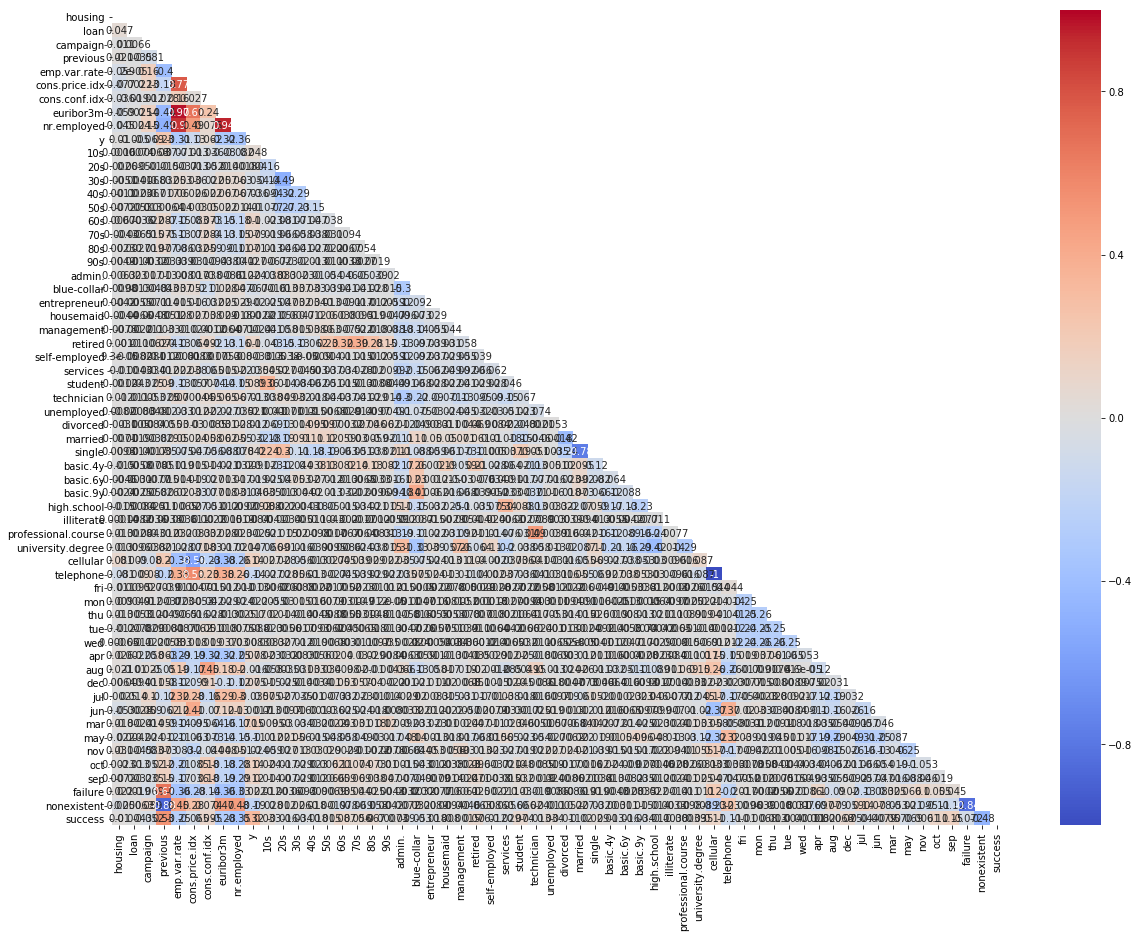

In [44]:
# Looking for multicollinearity
f, ax = plt.subplots(figsize=(20, 15))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)

In [64]:
df.to_csv('model_ready1.csv')

In [45]:
X = df.drop('y', axis=1)
y = df['y']


X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.25)

In [46]:
logreg = LogisticRegression(C=1e14, solver = 'lbfgs', fit_intercept=False)
model_1 = logreg.fit(X_train, y_train)
y_train_pred = model_1.predict(X_train)
y_test_pred = model_1.predict(X_test)
train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

In [47]:
print(test_report)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6653
           1       0.66      0.24      0.35       969

    accuracy                           0.89      7622
   macro avg       0.78      0.61      0.64      7622
weighted avg       0.87      0.89      0.86      7622



# KNN

In [48]:
knn = KNeighborsClassifier()

In [52]:
cross_validate(knn, X, y, scoring=['f1', 'recall', 'precision', 'accuracy'], cv =10)

{'fit_time': array([0.30040097, 0.25092793, 0.25015926, 0.30070925, 0.27954197,
        0.28122807, 0.2655201 , 0.29000306, 0.2890141 , 0.28045392]),
 'score_time': array([11.25675106, 11.26764989,  9.95424795,  8.91658378,  7.07130504,
         7.54062891, 10.02168894,  8.08126521,  7.68717098,  8.71761394]),
 'test_f1': array([0.        , 0.        , 0.03098107, 0.02424242, 0.00444444,
        0.104     , 0.11205074, 0.16284987, 0.21989529, 0.27047414]),
 'test_recall': array([0.        , 0.        , 0.02331606, 0.02072539, 0.00259067,
        0.06735751, 0.1373057 , 0.24870466, 0.27202073, 0.65194805]),
 'test_precision': array([0.        , 0.        , 0.04615385, 0.02919708, 0.015625  ,
        0.22807018, 0.09464286, 0.12105927, 0.18453427, 0.17063222]),
 'test_accuracy': array([0.87340112, 0.87012135, 0.81534929, 0.78878321, 0.85306658,
        0.85306658, 0.72449984, 0.67628731, 0.75565759, 0.55562849])}

In [51]:
test_f1= np.mean([0.        , 0.01403061, 0.01562031, 0.10258481, 0.28360049])
test_f1

0.083167244

# Decision Tree

In [53]:
dt_base = DecisionTreeClassifier(random_state=42)

In [54]:
cross_validate(dt_base, X, y, scoring=['f1', 'recall', 'precision', 'accuracy'], cv =15)

{'fit_time': array([0.14211702, 0.11796284, 0.11616373, 0.1135931 , 0.1218071 ,
        0.12880087, 0.13629603, 0.13638282, 0.12041616, 0.12469888,
        0.12655687, 0.12367415, 0.12077904, 0.1284101 , 0.1215961 ]),
 'score_time': array([0.00624704, 0.00578928, 0.00638318, 0.00554895, 0.00618386,
        0.0061121 , 0.00595689, 0.00610113, 0.00611591, 0.00602508,
        0.00565934, 0.00584388, 0.00611401, 0.00538492, 0.00563192]),
 'test_f1': array([0.        , 0.        , 0.0046875 , 0.00847458, 0.00389105,
        0.02042553, 0.00612089, 0.00801603, 0.0178731 , 0.00430108,
        0.02288092, 0.03527337, 0.03284672, 0.00720165, 0.15734597]),
 'test_recall': array([0.        , 0.        , 0.01162791, 0.03100775, 0.0077821 ,
        0.04669261, 0.0155642 , 0.0233463 , 0.03891051, 0.01167315,
        0.08560311, 0.11673152, 0.10505837, 0.02723735, 0.6459144 ]),
 'test_precision': array([0.        , 0.        , 0.00293542, 0.00490798, 0.00259403,
        0.0130719 , 0.00380952, 0.0048

In [57]:
test_f1= np.mean([0.0046875 , 0.00847458, 0.00389105,
        0.02042553, 0.00612089, 0.00801603, 0.0178731 , 0.00430108,
        0.02288092, 0.03527337, 0.03284672, 0.00720165, 0.15734597])
test_f1

0.025333722307692305

# Random Forest

In [73]:
regressor = RandomForestRegressor(n_estimators = 10, random_state= 42)
regressor.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [80]:
y_pred = regressor.predict(X_test)

In [86]:
accuracy_score(y_test, y_pred.round(), normalize=False)

7397

In [94]:
f1_score(y_test, y_pred.round(), average='weighted')

0.9694300198599912

In [92]:
y_pred.dtype

dtype('float64')

# XGBoost

In [59]:

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [95]:

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [96]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.34%


In [97]:
f1_score(y_test, y_pred.round(), average='weighted')

0.8662441563822079

# Tuning

In [65]:
param_grid= {
    
    
    'penalty':['l1','l2'],
    'solver':['liblinear', 'saga'],
    'class_weight':['balanced'],
    'random_state':[42]
}

In [66]:
gridsearch = GridSearchCV(estimator =logreg, param_grid=param_grid)
gridsearch.fit(X,y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=100000000000000.0,
                                          class_weight=None, dual=False,
                                          fit_intercept=False,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                         'random_state': [42],
                         'solver': ['liblinear', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scori

In [67]:
lg_refined = LogisticRegressionCV(Cs=4, 
                                  class_weight='balanced', 
                                  cv=3, penalty = 'l2', 
                                  random_state =42, 
                                  solver='liblinear')
lg_refined.fit(X,y)

LogisticRegressionCV(Cs=4, class_weight='balanced', cv=3, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=42, refit=True, scoring=None,
                     solver='liblinear', tol=0.0001, verbose=0)

In [68]:
cross_validate(lg_refined, X, y, scoring=['f1', 'recall', 'precision', 'accuracy', 'roc_auc'], cv=5)

{'fit_time': array([1.57925081, 3.05874205, 1.385602  , 1.11549687, 1.49448133]),
 'score_time': array([0.01541519, 0.0138979 , 0.01347089, 0.01369596, 0.01409984]),
 'test_f1': array([0.        , 0.419652  , 0.38134058, 0.31214628, 0.24906175]),
 'test_recall': array([0.        , 0.26554404, 0.54533679, 0.92875648, 0.94682231]),
 'test_precision': array([0.        , 1.        , 0.29317549, 0.18759812, 0.1433903 ]),
 'test_accuracy': array([0.87340112, 0.90701869, 0.77599213, 0.48179731, 0.27788714]),
 'test_roc_auc': array([0.53129104, 0.86022134, 0.69858053, 0.81450393, 0.709827  ])}

In [69]:
test_f1= np.mean([0.419652  , 0.38134058, 0.31214628, 0.24906175])
test_f1

0.3405501525